# **Submission Analisis Data MSIB Batch 7 Detik.com**

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Wrangling**

### Gathering data

In [3]:
data = pd.read_excel("data.xlsx")

In [5]:
data.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


**Penjelasan Setiap kolom pada dataset** <br> <br>
**ga:sourceMedium**	        = Sumber <br>
**ga:pageTitle**            = Judul halaman <br>
**ga:users** = Jumlah pengguna unik yang mengunjungi halaman. <br>
**ga:bounceRate** = Persentase sesi di mana pengguna hanya melihat satu halaman sebelum keluar. <br>
**ga:pageviews** = Total jumlah halaman yang dilihat. <br>
**ga:pageviewsPerSession** = Rata-rata jumlah halaman yang dilihat per sesi. <br>
**ga:avgTimeOnPage** = Rata-rata waktu yang dihabiskan pengguna pada halaman tersebut.





### Assessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


In [6]:
data.isna().sum()

,0
ga:sourceMedium,0
ga:pageTitle,0
ga:users,1
ga:bounceRate,1
ga:pageviews,1
ga:pageviewsPerSession,1
ga:avgTimeOnPage,1


Dari hasil diatas ditemukan missing value di beberapa kolom tetapi tidak ada kesalahan pada tipe data dan tidak ditemukan data duplikat

### Cleaning Data

Mengisi missing values dengan rata-rata kolom

In [7]:
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

In [8]:
data.isna().sum()

,0
ga:sourceMedium,0
ga:pageTitle,0
ga:users,0
ga:bounceRate,0
ga:pageviews,0
ga:pageviewsPerSession,0
ga:avgTimeOnPage,0


In [9]:
data.nunique()

,0
ga:sourceMedium,2
ga:pageTitle,151
ga:users,76
ga:bounceRate,49
ga:pageviews,90
ga:pageviewsPerSession,108
ga:avgTimeOnPage,156


In [10]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


## **Exploratory Data Analysis (EDA)**

**Analisis deskriptif**

In [14]:
data.describe()

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6428.476774,35.913769,11806.778695,32.417834,77.723318
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,17.047163
50%,233.000000,17.813737,431.000000,2.371212,45.800941
75%,460.250000,62.352822,846.250000,22.069444,109.165675
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


**Distribusi users**

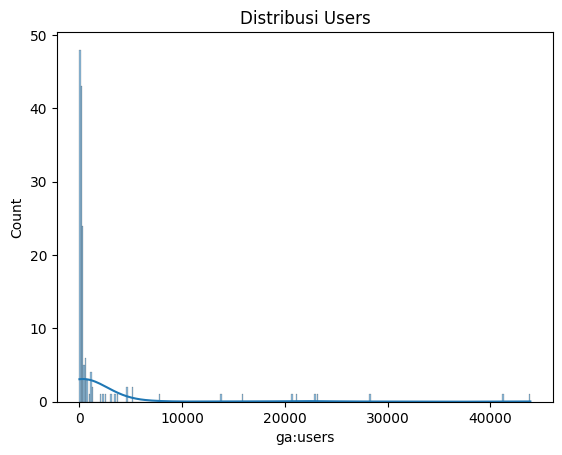

In [17]:
sns.histplot(data['ga:users'], kde=True)
plt.title('Distribusi Users')
plt.show()

Terdapat distribusi pengguna yang sangat lebar, dengan sebagian besar halaman memiliki jumlah pengguna yang relatif kecil (median = 233), namun terdapat beberapa halaman dengan jumlah pengguna yang sangat tinggi, seperti 43.893 pengguna, yang menyebabkan rata-rata menjadi tinggi. Namun, Median yang lebih rendah dari rata-rata menunjukkan bahwa distribusi pengguna condong ke arah jumlah yang lebih kecil.

**Distribusi Bounce Rate**

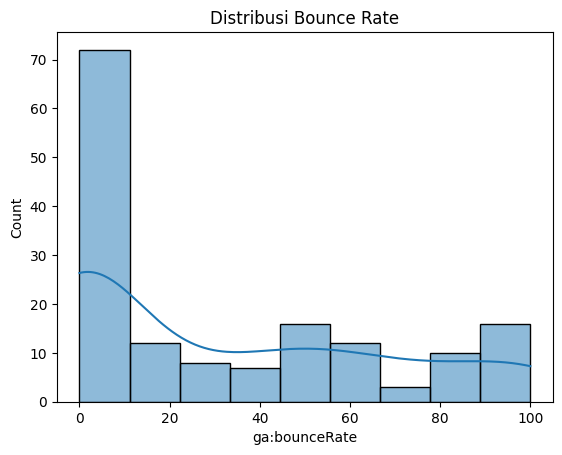

In [11]:
sns.histplot(data['ga:bounceRate'], kde=True)
plt.title('Distribusi Bounce Rate')
plt.show()

Terdapat variasi yang besar dalam bounce rate, dengan beberapa halaman memiliki bounce rate 0%, yang menunjukkan bahwa semua pengguna tersebut mengunjungi lebih dari satu halaman sebelum meninggalkan situs.   Di sisi lain, beberapa halaman mencapai 100%. Ini menunjukkan bahwa beberapa halaman memiliki pengunjung yang dengan kata lain tidak segera meninggalkan halaman, sementara yang lain tidak.

**Distribusi page views**

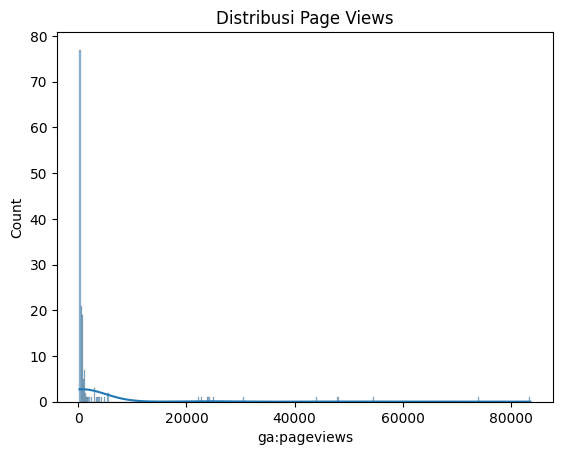

In [19]:
sns.histplot(data['ga:pageviews'], kde=True)
plt.title('Distribusi Page Views')
plt.show()

Jumlah tampilan halaman menunjukkan variasi yang besar, dengan beberapa halaman mendapatkan jumlah tampilan yang jauh lebih tinggi dari halaman lainnya. Hal ini mungkin terkait dengan popularitas atau relevansi konten tertentu yang sangat identik dan disukai oleh netizen Indonesia, atau mungkin promosi pemasaran yang berhasil. Distribusi ini menunjukkan bahwa sebagian besar halaman memiliki tampilan yang jauh lebih rendah daripada beberapa halaman yang sangat populer.

**Distribusi Page Views Per Session**

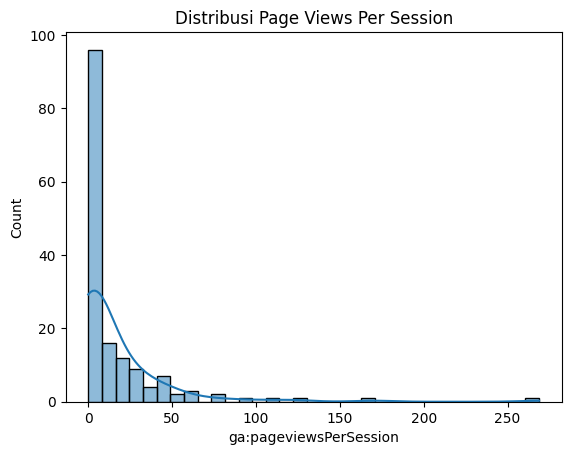

In [21]:
sns.histplot(data['ga:pageviewsPerSession'], kde=True)
plt.title('Distribusi Page Views Per Session')
plt.show()

Rata-rata jumlah tampilan halaman per sesi menunjukkan bahwa ada beberapa sesi di mana pengguna melihat banyak halaman, tetapi sebagian besar sesi hanya melibatkan sedikit tampilan halaman, yang tercermin dari median yang rendah yaitu sebanyak 2,37. Variasi yang besar ini mungkin disebabkan oleh tipe konten yang berbeda atau cara pengguna berinteraksi dengan menavigasi situs.

**Distribusi avg Time On Page**

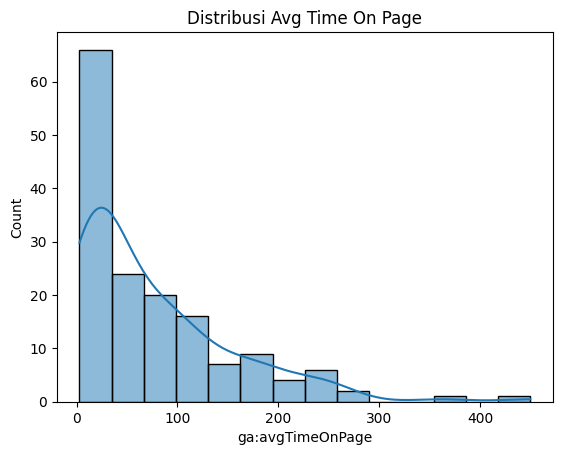

In [22]:
sns.histplot(data['ga:avgTimeOnPage'], kde=True)
plt.title('Distribusi Avg Time On Page')
plt.show()

Rata-rata waktu yang dihabiskan pada halaman bervariasi secara signifikan. Hal ini bisa menunjukkan bahwa beberapa halaman memiliki konten yang lebih menarik atau lebih panjang, sehingga membutuhkan waktu lebih lama untuk dibaca. Sebaliknya, halaman dengan waktu rendah mungkin tidak menarik perhatian pengguna atau mengandung konten yang cepat dibaca/simpel.

## **Pertanyaan Bisnis yang Bisa Diajukan:**

1. Apa yang menyebabkan beberapa halaman memiliki bounce rate yang tinggi, dan bagaimana kita bisa mengurangi bounce rate ini?

In [33]:
# Membuat DataFrame yang hanya berisi kolom yang dibutuhkan
scatter_df = data[['ga:bounceRate', 'ga:pageviews', 'ga:sourceMedium']]

# Menampilkan 10 data teratas sebagai contoh
scatter_df.head(10)


,ga:bounceRate,ga:pageviews,ga:sourceMedium
0,19.269967,83593.0,facebook / cpc
1,62.303763,74032.0,facebook / cpc
2,30.934520,54657.0,facebook / cpc
3,6.966219,47924.0,facebook / cpc
4,11.630219,44072.0,facebook / cpc
5,82.671710,30570.0,facebook / cpc
6,81.563047,24941.0,facebook / cpc
7,12.714033,24097.0,facebook / cpc
8,95.351267,23989.0,facebook / cpc
9,88.144207,22642.0,facebook / cpc


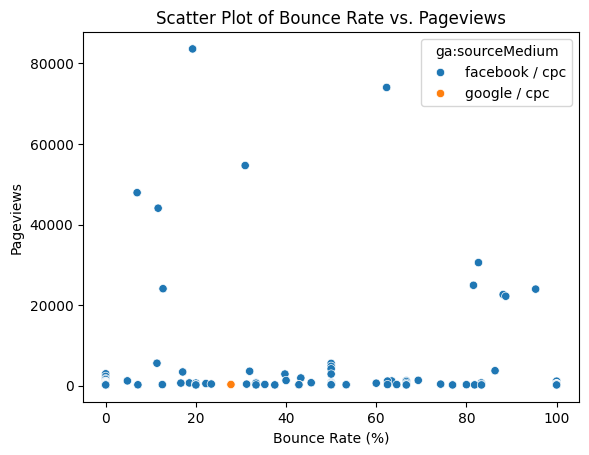

In [23]:
# Scatter plot untuk melihat hubungan antara rasio pentalan dan metrik lain
sns.scatterplot(data=data, x='ga:bounceRate', y='ga:pageviews', hue='ga:sourceMedium')
plt.title('Scatter Plot of Bounce Rate vs. Pageviews')
plt.xlabel('Bounce Rate (%)')
plt.ylabel('Pageviews')
plt.show()

In [34]:
# Menghitung statistik deskriptif untuk 'ga:bounceRate' berdasarkan 'ga:sourceMedium'
boxplot_df = data.groupby('ga:sourceMedium')['ga:bounceRate'].describe()

# Menampilkan hasil
boxplot_df


,count,mean,std,min,25%,50%,75%,max
ga:sourceMedium,,,,,,,,
facebook / cpc,151.0,31.853101,35.880237,0.0,0.0,17.070773,62.401881,100.0
google / cpc,5.0,34.126984,41.185812,0.0,0.0,27.777778,42.857143,100.0


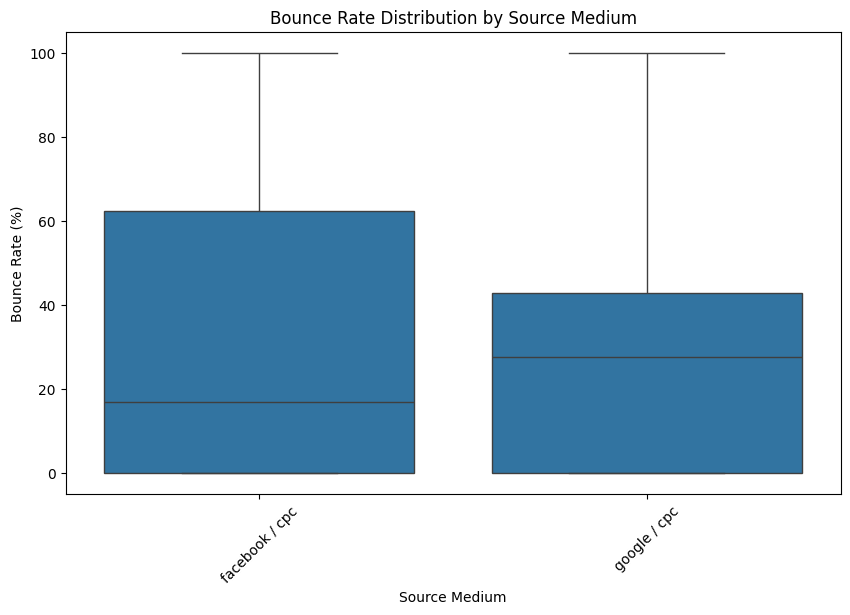

In [24]:
# Box plot untuk melihat distribusi bounce rate berdasarkan sumber traffic
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='ga:sourceMedium', y='ga:bounceRate')
plt.title('Bounce Rate Distribution by Source Medium')
plt.xlabel('Source Medium')
plt.ylabel('Bounce Rate (%)')
plt.xticks(rotation=45)
plt.show()

2. Apa faktor yang mempengaruhi jumlah tampilan halaman yang tinggi dan waktu yang dihabiskan di halaman tertentu, dan bagaimana kita bisa mereplikasi kesuksesan ini di halaman lain?

In [30]:
# Hitung korelasi antara metrik
corr = data[['ga:users', 'ga:pageviews', 'ga:pageviewsPerSession', 'ga:avgTimeOnPage']].corr()

# Tampilkan matriks korelasi
print("Correlation Matrix of Key Metrics:")
print(corr)


Correlation Matrix of Key Metrics:
                        ga:users  ga:pageviews  ga:pageviewsPerSession  \
ga:users                1.000000      0.744993               -0.007751   
ga:pageviews            0.744993      1.000000               -0.033231   
ga:pageviewsPerSession -0.007751     -0.033231                1.000000   
ga:avgTimeOnPage        0.112836     -0.022068               -0.033222   

                        ga:avgTimeOnPage  
ga:users                        0.112836  
ga:pageviews                   -0.022068  
ga:pageviewsPerSession         -0.033222  
ga:avgTimeOnPage                1.000000  


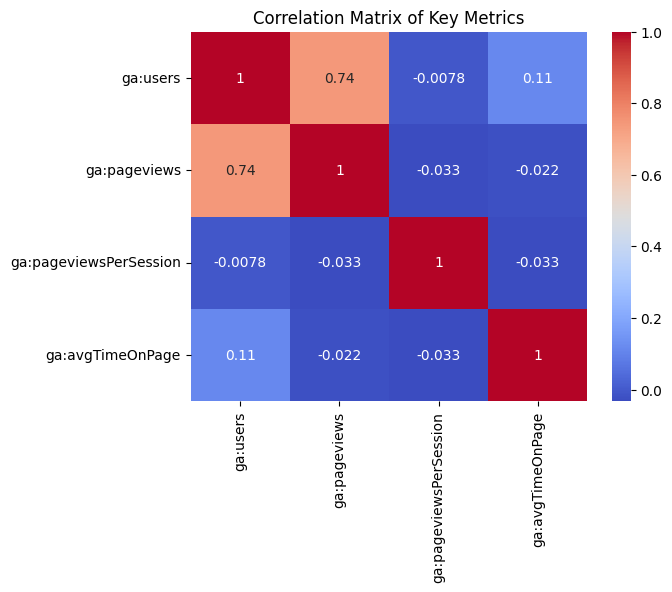

In [31]:
# Heatmap untuk melihat korelasi antara metrik
corr = data[['ga:users', 'ga:pageviews', 'ga:pageviewsPerSession', 'ga:avgTimeOnPage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

In [29]:
top_pages = data.sort_values(by='ga:pageviews', ascending=False).head(10)

# Tampilkan hasil dalam bentuk tabel
top_pages[['ga:pageTitle', 'ga:pageviews']]


,ga:pageTitle,ga:pageviews
0,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",83593.0
1,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,74032.0
2,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",54657.0
3,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",47924.0
4,Melihat Kantor Pelayanan Grab Driver Center,44072.0
5,2 Pelajar di Yogya Lempar Batu ke Mobil hingga...,30570.0
6,Sultan Brunei Laporkan Kasus Pencemaran Nama B...,24941.0
7,"Kabar Duka, Sys NS Meninggal Dunia",24097.0
8,"Viral Wali Kota Mataram Tendang Satpol PP, Ini...",23989.0
9,Polisi Amankan Istri yang Jual Suami Demi Laya...,22642.0


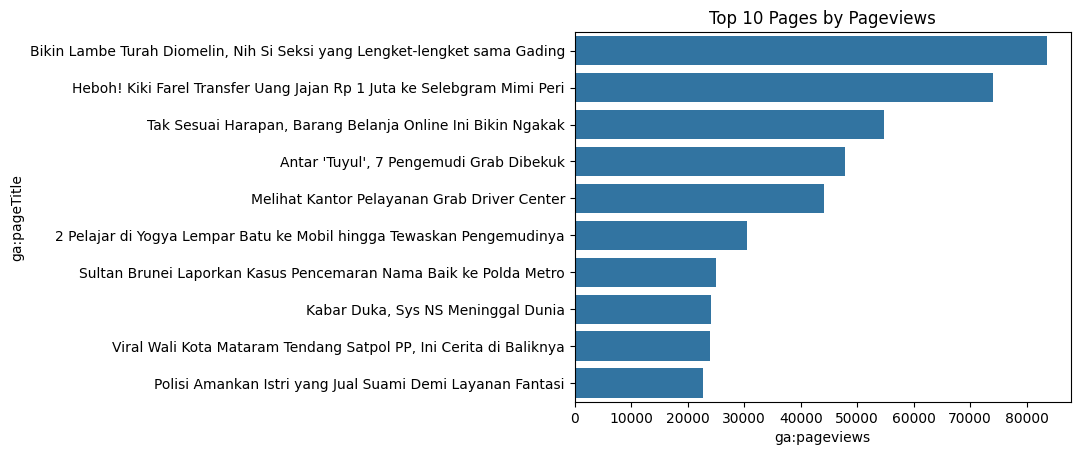

In [32]:
# Bar chart untuk melihat halaman dengan tampilan tertinggi
top_pages = data.sort_values(by='ga:pageviews', ascending=False).head(10)
sns.barplot(x='ga:pageviews', y='ga:pageTitle', data=top_pages)
plt.title('Top 10 Pages by Pageviews')
plt.show()

## **Kesimpulan**

**Pertanyaan 1**



*   Terlihat bahwa halaman dengan pageviews tinggi cenderung memiliki bounce rate yang bervariasi.
*   Terdapat beberapa halaman dengan bounce rate rendah yang memiliki pageviews sangat tinggi, yang bisa menunjukkan bahwa konten tersebut sangat menarik bagi pengunjung, sehingga mereka tidak langsung keluar dari situs setelah melihat satu halaman.

*   Hampir semua titik yang dianalisis berasal dari sumber facebook / cpc dengan 151 sesi, dengan hanya satu titik yaitu 5 sesi dari google / cpc. Ini menunjukkan bahwa sebagian besar traffic berasal dari Facebook, yang mungkin berdampak pada pola bounce rate dan pageviews.

*   Standar deviasi (std) dari google / cpc lebih tinggi (41.18) dibandingkan facebook / cpc (35.88) yang menunjukkan bahwa terdapat variabilitas yang lebih besar dalam bounce rate dari google / cpc. Dengan kata lain, pengalaman pengguna dari google / cpc lebih bervariasi walaupun dengan jumlah data yang sedikit, yang bisa disebabkan oleh berbagai faktor seperti relevansi halaman yang dikunjungi atau jenis promosinya.
*   Kedua sumber memiliki nilai minimum 0%, yang menunjukkan bahwa beberapa pengguna tidak mengalami bounce rate sama sekali. Nilai maksimum untuk keduanya adalah 100%, yang berarti beberapa pengguna meninggalkan halaman tanpa melakukan interaksi lain.





**Pertanyaan 2**



*   Korelasi Tinggi antara ga:users dan ga:pageviews menunjukkan bahwa semakin banyak pengguna unik (ga:users), maka kemungkinan besar jumlah tampilan halaman (ga:pageviews) juga akan meningkat. Hal ini bisa diartikan bahwa trafik yang lebih tinggi cenderung menghasilkan lebih banyak tampilan halaman.
*   Korelasi Negatif atau Rendah antara ga:pageviewsPerSession dan metrik lainnya, serta antara ga:avgTimeOnPage dengan metrik lainnya, menunjukkan bahwa tidak ada hubungan kuat antara banyaknya halaman yang dilihat dalam satu sesi atau waktu rata-rata yang dihabiskan pada halaman dengan metrik lainnya seperti ga:users atau ga:pageviews. Ini bisa mengindikasikan bahwa sesi yang lebih panjang atau lebih pendek tidak selalu berkorelasi dengan jumlah pengguna atau tampilan halaman.


*   Beberapa halaman memiliki jumlah tampilan yang sangat tinggi, seperti artikel tentang "Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket - lengket sama Gading" yang memiliki lebih dari 80 ribu tampilan halaman. Hal ini menunjukkan popularitas konten yang sangat tinggi dan dapat memberikan wawasan mengenai jenis konten yang menarik banyak perhatian pengguna.
*   Banyak dari halaman yang masuk ke dalam daftar 10 teratas berkaitan dengan topik-topik kontroversial, sensasional, atau berita terkini, yang menunjukkan bahwa pengguna tertarik pada jenis konten ini.

